<a href="https://colab.research.google.com/github/Dobenkss/ModelEvaluation/blob/main/10_ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **10. Model Evaluation**

### **Kompetensi**

CPMK23:**Mahasiswa mampu menerapkan metode evaluasi data**
<br>

SCPMK 1682310: **Mahasiswa dapat memvalidasi dan menguji hasil pemodelan klasifikasi**
<br>

Indicator:
**Mahasiswa dapat memvisualisasikan (grafik confusion matrix, nilai cacurasi, F1-score, Precision & recall, grafik ROC ) hasil pemodelan klasifikasi menggunakan bahasa pemrograman**


### **Tujuan Praktikum**

1. mahasiswa mampu melakukan evaluasi pada model-model klasifikasi
2. mahasiswa mengetahui metrik yang terbaik untuk mengukur kinerja sebuah model
3. mahasiswa dapat membandingkan beberapa model
4. Mahasiswa dapat melakukan beberapa metode evaluasi: holdout, cross valiadtion
5. mahasiswa dapat melakukan hyperparameter tuning

### **Evaluasi Model**

Evaluasi model adalah proses menilai sejauh mana sebuah model dapat melakukan klasifikasi atau prediksi yang tepat. Proses ini bertujuan untuk mengetahui seberapa baik model tersebut dapat menerapkan pengetahuan yang telah dipelajarinya dari data training ke dalam data baru. Ada berbagai metode evaluasi yang dapat digunakan, seperti menghitung akurasi (kelasifikasi benar dibagi dengan total data), menghitung presisi dan recall (untuk klasifikasi multi-kelas), atau menghitung nilai loss (untuk regresi).

### **Dataset:**

menggunakan dataset yang telah embeded di sckit learn, yakni [dataset breast ](https://scikit-learn.org/stable/api/sklearn.datasets.html)cancer

**1. Load Data**

In [ ]:
#import library
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

#create instance for load_breast_cancer
data_breast_cancer = load_breast_cancer()

#load dataset into dataframe
df_breast_cancer = pd.DataFrame(data = data_breast_cancer.data,
                                columns = data_breast_cancer.feature_names)
df_breast_cancer['target'] = data_breast_cancer.target

#show first 5 data
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Skip EDA & Preprocessing

**Hold Out, Splitting**

**Splitting 80:20**

In [ ]:
#split into X and y
X = data_breast_cancer.data
y = data_breast_cancer.target

In [ ]:
#train and test split with rasio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [ ]:
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size  :',X_test.shape)
print('y_test size  :',y_test.shape)

X_train size : (455, 30)
y_train size : (455,)
X_test size  : (114, 30)
y_test size  : (114,)


**Training Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Training the Naive Bayes model on the Training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions_nb = model_nb.predict(X_test)

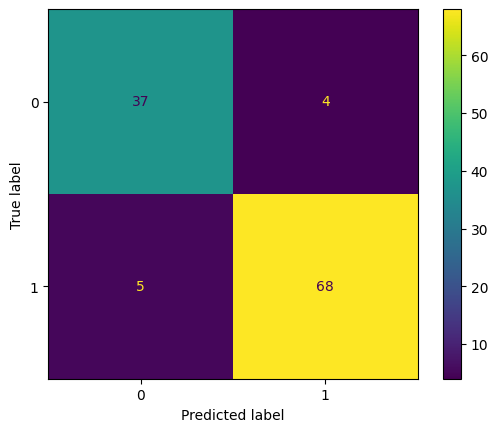

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_nb, labels=model_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_nb.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.94      0.93      0.94        73

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



lakukan spliting dengan rasio 30:70 & 25:75

**Splitting 70:30**

In [ ]:
#train and test split with rasio 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [ ]:
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size  :',X_test.shape)
print('y_test size  :',y_test.shape)

X_train size : (398, 30)
y_train size : (398,)
X_test size  : (171, 30)
y_test size  : (171,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Training the Naive Bayes model on the Training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions_nb = model_nb.predict(X_test)

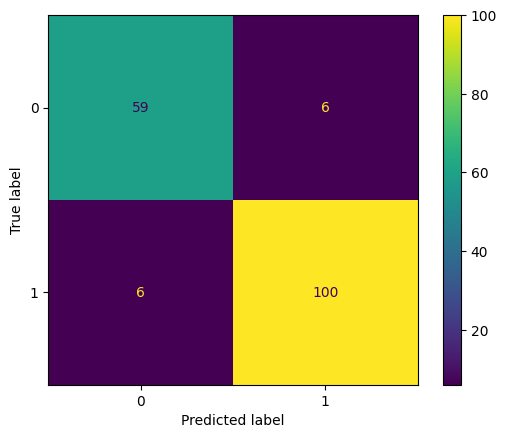

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_nb, labels=model_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_nb.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.95      0.93      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



**Splitting 75:25**

In [ ]:
#train and test split with rasio 70:25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [ ]:
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size  :',X_test.shape)
print('y_test size  :',y_test.shape)

X_train size : (426, 30)
y_train size : (426,)
X_test size  : (143, 30)
y_test size  : (143,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Training the Naive Bayes model on the Training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions_nb = model_nb.predict(X_test)

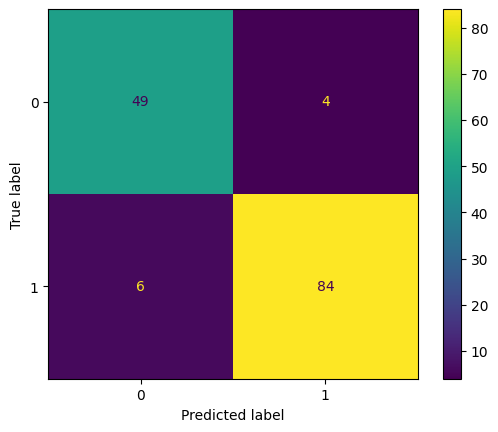

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_nb, labels=model_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_nb.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.95      0.93      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



lakukan prediction terhadap data testnya, dan generate classification reportnya

**K Fold Cross validation**

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [ ]:
model = GaussianNB()
scores = cross_validate(model, X, y, cv=5, scoring=scoring,return_train_score=False)

In [ ]:
print("Hasil tiap fold:")
print("Accuracy :", scores['test_accuracy'])
print("Precision:", scores['test_precision'])
print("Recall   :", scores['test_recall'])
print("F1-score :", scores['test_f1'])

print("\nNilai rata-rata (Mean):")
print("Accuracy :", np.mean(scores['test_accuracy']))
print("Precision:", np.mean(scores['test_precision']))
print("Recall   :", np.mean(scores['test_recall']))
print("F1-score :", np.mean(scores['test_f1']))

Hasil tiap fold:
Accuracy : [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Precision: [0.94285714 0.8974359  0.93421053 0.94594595 0.95833333]
Recall   : [0.92957746 0.98591549 0.98611111 0.97222222 0.97183099]
F1-score : [0.93617021 0.93959732 0.95945946 0.95890411 0.96503497]

Nilai rata-rata (Mean):
Accuracy : 0.9385188635305075
Precision: 0.9357565691776217
Recall   : 0.9691314553990612
F1-score : 0.951833212457133


lakukan cross validasi sekali lagi dengan jumlah fold 10

# CART

*splitting 80:20

In [ ]:
#split into X and y
X = data_breast_cancer.data
y = data_breast_cancer.target

In [ ]:
#train and test split with rasio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [ ]:
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size  :',X_test.shape)
print('y_test size  :',y_test.shape)

X_train size : (455, 30)
y_train size : (455,)
X_test size  : (114, 30)
y_test size  : (114,)


In [ ]:
#build model
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
model_cart = DecisionTreeClassifier()
model_cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions_cart = model_cart.predict(X_test)

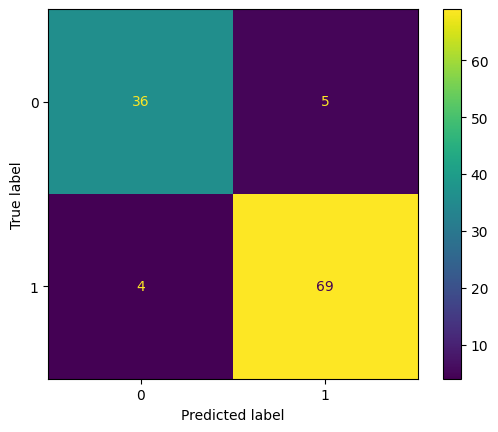

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_cart, labels=model_cart.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_cart.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_cart))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.93      0.95      0.94        73

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



splitting 70:30

In [ ]:
#train and test split with rasio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [ ]:
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size  :',X_test.shape)
print('y_test size  :',y_test.shape)

X_train size : (398, 30)
y_train size : (398,)
X_test size  : (171, 30)
y_test size  : (171,)


In [ ]:
#build model
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
model_cart = DecisionTreeClassifier()
model_cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions_cart = model_cart.predict(X_test)

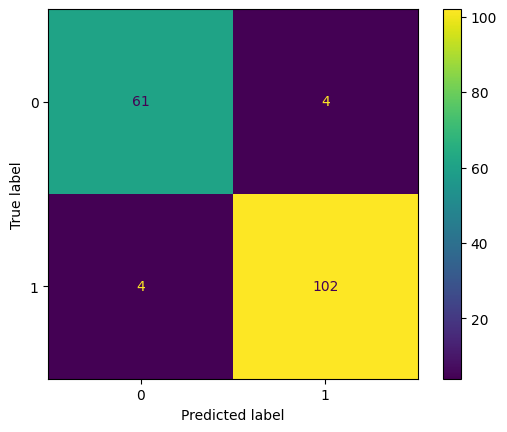

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_cart, labels=model_cart.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_cart.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_cart))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.96      0.96      0.96       106

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



*splitting 70:25

In [ ]:
#train and test split with rasio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [ ]:
#train test shape
print('X_train size :',X_train.shape)
print('y_train size :',y_train.shape)
print('X_test size  :',X_test.shape)
print('y_test size  :',y_test.shape)

X_train size : (426, 30)
y_train size : (426,)
X_test size  : (143, 30)
y_test size  : (143,)


In [ ]:
#build model
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
model_cart = DecisionTreeClassifier()
model_cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions_cart = model_cart.predict(X_test)

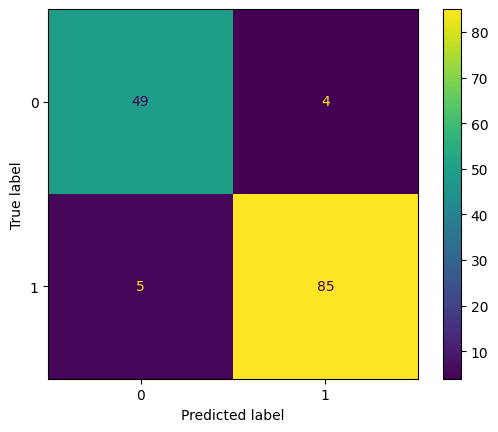

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_cart, labels=model_cart.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_cart.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_cart))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



tampilkan hasil classification reportnya

lakukan splitting di 25%75 dan 30%70%